In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def g(ms,mp,r):
    G = 6.67*10**-11 #units N*m**2/kg**2
    return G*(ms*mp)/r**2
#general force of gravity equation

In [5]:
#mass of Earth in kg
E = 6*10**24
#mass of our moon in kg
M = 7.5*10**22

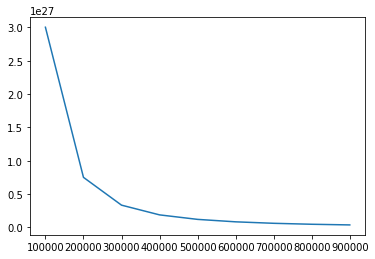

In [6]:
#quick test
d = np.arange(100000,1000000,100000)
plt.plot(d,g(E,M,d))

# Single-Body Simulator

In [7]:
#simulator for a stationary center and a second body orbitting it
#expects kg, kg, m, seconds(total time), seconds(step), m/s
def one_body(mp,mm,r,t,dt,v0):  
    tim = np.arange(1,t,dt)
    
    x1 = np.array([r])
    y1 = np.array([0])
    
    vx = 0
    vy = v0
    
    for i in tim:
        G = 6.67*10**-11 #units N*m**2/kg**2
        
        rx = x1[-1] #current position
        ry = y1[-1]
        
        rcurrent = np.sqrt(rx**2 + ry**2) #current distance to origin
        theta = np.abs(np.arcsin(ry/rcurrent)) #angle between Force vector and x-axis
        Fx = -np.sign(rx) * np.cos(theta)*(G*(mp*mm)/rcurrent**2) #current acting Force
        Fy = -np.sign(ry) * np.sin(theta)*(G*(mp*mm)/rcurrent**2)
        
        ax = Fx/mm #current acting acceleration
        ay = Fy/mm
        
        vx += ax * dt #finds current velocity 
        vy += ay * dt

        rxf = rx + vx * dt #find next position
        ryf = ry + vy * dt
        
        x1 = np.append(x1,rxf)
        y1 = np.append(y1,ryf)
        
        
    return plt.plot(x1,y1,'b.'), plt.plot(0,0,'y*')

([<matplotlib.lines.Line2D at 0x7fc3846e6f10>],
 [<matplotlib.lines.Line2D at 0x7fc384760550>])

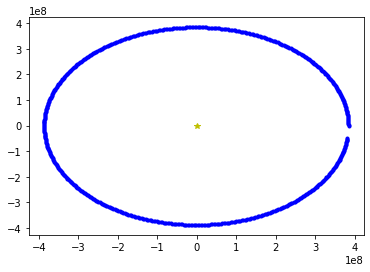

In [8]:
scyc = 648*3600 #648 hrs in one moon cycle aorund the Earth  
d = 384400*1000 #384400 km from Earth to moon
ms = 1022 #avd speed of moon in m/s

one_body(E,M,d,scyc,3600,1022)


# Two-Body Simulator

In [9]:
#equations for reference
a = F/m #for each mass
vf = v0 + a*dt
xf = x0 + v*t

NameError: name 'F' is not defined

In [10]:
#mp:first mass input (kg)
#vp0:initial velocity of mp
#mm:second mass input (kg)
#vm0:initial velocity of mm
#r:initial distance between the two bodies (m)
#t:total time the simulation will run (seconds)
#dt:time step increment (seconds)

def two_body(mp,vp0,mm,vm0,r,t,dt):
    tim2 = np.arange(1,t,dt)
    
    x1 = np.array([0]) #where 1 represents mp
    y1 = np.array([0])
    vx1 = 0
    vy1 = vp0 #NOTE TO SOFIA: specify orientaton
    
    x2 = np.array([r]) #where 2 represents mm
    y2 = np.array([0])
    vx2 = 0
    vy2 = vm0
 
    for i in tim2:    
        G = 6.67*10**-11 #units N*m**2/kg**2
        
        rx1 = x1[-1] #position of mp
        ry1 = y1[-1]
        
        rx2 = x2[-1] #position of mm
        ry2 = y2[-1]
        
        rcurrent = np.sqrt((rx2-rx1)**2+(ry2-ry1**2)) #current distance between bodies
        
        theta = np.abs(np.arcsin(ry1/rcurrent)) #angle between Force vector and x-axis
        Fx1 = -np.sign(rx1) * np.cos(theta)*(G*(mp*mm)/rcurrent**2) #current acting Force
        Fy1 = -np.sign(ry1) * np.sin(theta)*(G*(mp*mm)/rcurrent**2)
        
        omega = np.abs(np.arcsin(ry2/rcurrent)) #angle between Force vector and x-axis
        Fx2 = -np.sign(rx2) * np.cos(omega)*(G*(mp*mm)/rcurrent**2) #current acting Force
        Fy2 = -np.sign(ry2) * np.sin(omega)*(G*(mp*mm)/rcurrent**2)
        
        ax1 = Fx1/mp #current acting acceleration, velocity, next pos for mp 
        ay1 = Fy1/mp
        vx1 += ax1 * dt
        vy1 += ay1 * dt
        rxf1 = rx1 + vx1 * dt 
        ryf1 = ry1 + vy1 * dt
        x1 = np.append(x1,rxf1) #appends next pos to the x1 array
        y1 = np.append(y1,ryf1)
    
        ax2 = Fx2/mm #current acting acceleration, velocity, next pos for mp
        ay2 = Fy2/mm
        vx2 += ax2 * dt 
        vy2 += ay2 * dt
        rxf2 = rx2 + vx2 * dt
        ryf2 = ry2 + vy2 * dt
        x12 = np.append(x1,rxf2)
        y12 = np.append(y1,ryf2)
        
        print(theta,omega)
        
    #return plt.plot(x1,y1,'b.'), plt.plot(x2,y2,'r.'), plt.show()

In [11]:
#mp:first mass input (kg)
#vp0:initial velocity of mp
#mm:second mass input (kg)
#vm0:initial velocity of mm
#r:initial distance between the two bodies (m)
#t:total time the simulation will run (seconds)
#dt:time step increment (seconds)

two_body(M,ms,M,-ms,d,3600,120)

0.0 0.0
0.00031904268554163855 0.0
0.0006380855005778665 0.0
0.0009571285746035489 0.0
0.0012761720371141025 0.0
0.00159521601760577 0.0
0.0019142606455758975 0.0
0.0022333060505232098 0.0
0.0025523523619480843 0.0
0.002871399709352829 0.0
0.0031904482222419573 0.0
0.003509498030122463 0.0
0.0038285492625040967 0.0
0.004147602048899642 0.0
0.004466656518825191 0.0
0.00478571280180042 0.0
0.00510477102734886 0.0
0.005423831324998187 0.0
0.0057428938242804805 0.0
0.006061958654732509 0.0
0.006381025945896005 0.0
0.006700095827317942 0.0
0.007019168428550805 0.0
0.007338243879152871 0.0
0.007657322308688484 0.0
0.007976403846728333 0.0
0.008295488622849716 0.0
0.008614576766636843 0.0
0.008933668407681082 0.0
0.009252763675581251 0.0


# N-Body Simulator

In [ ]:
#FOR REFERENCE ONLY; see GitHub folder General-Small-Programs for source

homework = ()
quizzes = ()
exams = ()
final_exam = 
#if there is no grade for a category, put 'N/A'
hw = np.sum(homework)/len(homework)
qz = np.sum(quizzes)/len(quizzes)
xms = np.sum(exams)/len(exams) 
#gets averages of the categories with more than one value
percent = np.array([])
Grade = np.array([])
if type(hw) == np.int32 or type(hw) == np.float64:
        percent = np.append(percent,#)
        Grade = np.append(Grade,hw)
if type(qz) == np.int32 or type(qz) == np.float64:
        percent = np.append(percent,#)
        Grade = np.append(Grade,qz)
if type(xms) == np.int32 or type(xms) == np.float64:
        percent = np.append(percent,#)
        Grade = np.append(Grade,xms)
if type(final_exam) == int or type(final_exam) == float:
        percent = np.append(percent,#)
        Grade = np.append(Grade,final_exam)
ratio = percent/np.sum(percent)
Final_Grade = np.sum(Grade*ratio)
print(Final_Grade)

In [ ]:
#repurposed code from General-Small-Programs
import pandas as pd

def NBody():
    o = input('How many bodies would you like to simulate? ')
    while type(o) == np.int32 or type(hw) == np.float64:
        nb = np.arange(1,o+1,1)
        pd.df()
        for i in nb:
            
        
        
        
        
        print('Please follow the next instructions. If you have not received any grades in a category, please put "N/A" ')
        hhh = input('Please type the homework grades you have gotten so far seperated by a comma. ')
        while hhh != 'N/A' and hhh != 'n/a' and hhh != 'N/a':
            hhh = list(map(int,(hhh).split(','))) #Fix placement of this
            while type(hhh)!= list:
                print('Sorry, I dont understand. For example if your homework is scored out of five, and you got four points on all of them, you will input "80,80,80,80"')
                print('If you do not have any homework grades to enter, please enter "N/A"')
                hhh = input('Lets try again. Please type the homework grades you have gotten so far seperated by a comma. ')
                hhh = list(map(int,(x).split(',')))
                break
            if type(hhh)==list:
                hhh = np.array(hhh)
                ph = float(input('Great, and what percent of your grade is homework worth? '))
                hw = np.sum(hhh)/len(hhh)
                percent = np.append(percent,ph)
                Grade = np.append(Grade,hw)
                print('Okay, next question:')
        if hhh == 'N/A' or hhh == 'n/a' or hhh == 'N/a':
            print('Thats okay. Next question then:')
        qqq = input('Please type the quiz grades you have gotten so far seperated by a comma. ')
        if qqq == 'N/A' or hhh == 'n/a' or hhh == 'N/a':
            print('Thats okay. Next question then:')
        else: 
            qqq = np.array(list(map(int,(qqq).split(','))))
            pq = float(input('Great, and what percent of your grade are quizzes worth? '))
            qz = np.sum(qqq)/len(qqq)
            percent = np.append(percent,pq)
            Grade = np.append(Grade,qz)
            print('Okay, next question:')
        eee = input('Please type the exam grades you have gotten so far seperated by a comma. ')
        if eee == 'N/A' or hhh == 'n/a' or hhh == 'N/a':
            print('Thats okay. Next question then:')
        else: 
            eee = np.array(list(map(int,(eee).split(','))))
            pe = float(input('Great, and what percent of your grade are exams worth? '))
            xms = np.sum(eee)/len(eee)
            percent = np.append(percent,pe)
            Grade = np.append(Grade,xms)
            print('Okay, next question:')
        idk = input('Have you taken your final exam yet? y/n')
        if idk == 'y':
            xms = float(input('Please type your final exam score.'))
            pf = float(input('Great, and what percent of your grade is the final worth?'))
            percent = np.append(percent,pf)
            Grade = np.append(Grade,final_exam)
        else: 
            print('Thats okay. Calculating...')
        ratio = percent/np.sum(percent)
        Final_Grade = np.sum(Grade*ratio)
        return plt.plot(stuff)
        break

In [ ]:
masses = ()

def rt(mp,mm,r,t,dt,v0):  
    tim = np.arange(1,t,dt)
    
    x1 = np.array([r])
    y1 = np.array([0])
    
    vx = 0
    vy = v0
    
    for i in tim:
        G = 6.67*10**-11 #units N*m**2/kg**2
        
        rx = x1[-1] #current position
        ry = y1[-1]
        
        rcurrent = np.sqrt(rx**2 + ry**2) #current distance to origin
        theta = np.abs(np.arcsin(ry/rcurrent)) #angle between Force vector and x-axis
        Fx = -np.sign(rx) * np.cos(theta)*(G*(mp*mm)/rcurrent**2) #current acting Force
        Fy = -np.sign(ry) * np.sin(theta)*(G*(mp*mm)/rcurrent**2)
        
        ax = Fx/mm #current acting acceleration
        ay = Fy/mm
        
        vx += ax * dt #finds current velocity 
        vy += ay * dt

        rxf = rx + vx * dt #find next position
        ryf = ry + vy * dt
        
        x1 = np.append(x1,rxf)
        y1 = np.append(y1,ryf)
        
        
    return plt.plot(x1,y1,'b.'), plt.plot(0,0,'y*')

AttributeError: 'numpy.ndarray' object has no attribute 'split'